In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [102]:
df = pd.read_csv('Reviews.csv')

In [103]:
c

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [104]:
df['Text'].values[1]

'Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".'

In [105]:
df.shape

(568454, 10)

In [106]:
df = df.head(500)   # only using 500 rows for now

In [107]:
df.shape

(500, 10)

# Quick EDA

In [108]:
df['Score'].value_counts().sort_index()

Score
1     36
2     18
3     37
4     70
5    339
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

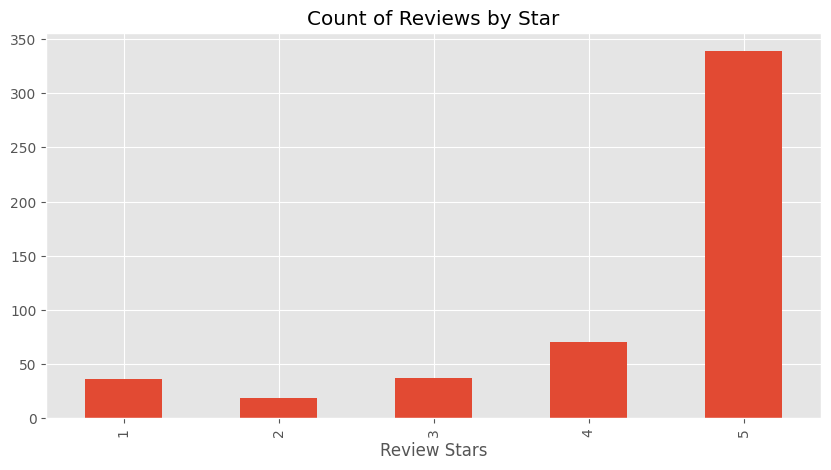

In [109]:
ax = df['Score'].value_counts().sort_index().plot(kind = 'bar', title = 'Count of Reviews by Star',
                                             figsize = (10,5))
ax.set_xlabel('Review Stars')
plt.show

# Basic NLTK

In [110]:
example = df['Text'][50]
example

"This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go."

In [111]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sauravkunwar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/sauravkunwar/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [112]:
# Tokenization helps in Sentiment Analysis by:
# 1) Splitting text into smaller units (words/sentences) for processing
# 2) Making text usable for ML models (models need tokens, not raw sentences)
# 3) Helping build features like Bag of Words, TF-IDF, word embeddings
# 4) Supporting sentiment detection word-by-word (good, bad, not, very, etc.)
# 5) Improving handling of punctuation/emojis (e.g., "great!!", ":)", "😡")
# 6) Preparing data for further NLP steps like stemming, lemmatization, POS tagging


In [113]:
# This part helps to convert a sentence into tokens through which a machine can easily intrepret the sentence


example = df['Text'][50]
tokens = nltk.word_tokenize(example)
tokens[:10]

['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft']

In [114]:
import nltk
nltk.download('averaged_perceptron_tagger_eng')


[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /Users/sauravkunwar/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [115]:
# POS (Part of Speech) tagging helps in Sentiment Analysis by:
# 1) Identifying sentiment words easily (mostly adjectives like good/bad, amazing/terrible)
# 2) Detecting intensity words (adverbs like very, extremely, slightly)
# 3) Handling negation better (not good -> negative meaning)
# 4) Reducing noise by selecting useful words (adj/adv) instead of all tokens
# 5) Supporting aspect-based sentiment (nouns = aspects like battery/camera, adjectives = opinion)

In [116]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ')]

In [117]:
import nltk

# download required resources (run once)
nltk.download('maxent_ne_chunker_tab')
nltk.download('words')

# Named Entity Recognition (chunking)
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()


(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /Users/sauravkunwar/nltk_data...
[nltk_data]   Package maxent_ne_chunker_tab is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/sauravkunwar/nltk_data...
[nltk_data]   Package words is already up-to-date!


# VADER Sentiment Scoring

**VADER (Valence Aware Dictionary and sEntiment Reasoner)** is a lexicon and rule-based sentiment analysis tool designed for **social media text**.  

- It assigns **sentiment scores** to text:  
  - **Positive**  
  - **Negative**  
  - **Neutral**  
  - **Compound** (overall sentiment between -1 to 1)  
- Works well with **emojis, slang, and punctuation**.  
- Simple and fast; does not require training data.  
- Often used for **quick sentiment analysis on reviews, tweets, or comments**.


In [118]:
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/sauravkunwar/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [119]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

# initialize VADER
sia = SentimentIntensityAnalyzer()


In [120]:
sia

In [121]:
sia.polarity_scores('This is the best weekend ever')

{'neg': 0.0, 'neu': 0.543, 'pos': 0.457, 'compound': 0.6369}

In [122]:
text = 'This is my worst weekend ever!'
score = sia.polarity_scores(text)
print(score)

{'neg': 0.468, 'neu': 0.532, 'pos': 0.0, 'compound': -0.6588}


In [123]:
example

"This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go."

In [124]:
score = sia.polarity_scores(example)
print(score)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}


In [125]:
# Now we are gonna run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total = len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/500 [00:00<?, ?it/s]

In [126]:
pd.DataFrame(res).T

,neg,neu,pos,compound
1,0.000,0.695,0.305,0.9441
2,0.138,0.862,0.000,-0.5664
3,0.091,0.754,0.155,0.8265
4,0.000,1.000,0.000,0.0000
5,0.000,0.552,0.448,0.9468
...,...,...,...,...
496,0.000,0.554,0.446,0.9725
497,0.059,0.799,0.142,0.7833
498,0.025,0.762,0.212,0.9848
499,0.041,0.904,0.055,0.1280


In [127]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})  # rename index to 'Id'
vaders = vaders.merge(df, how='left', on='Id')  # merge on Id


In [128]:
vaders.head()
# Now we have sentiment score and metadata


,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


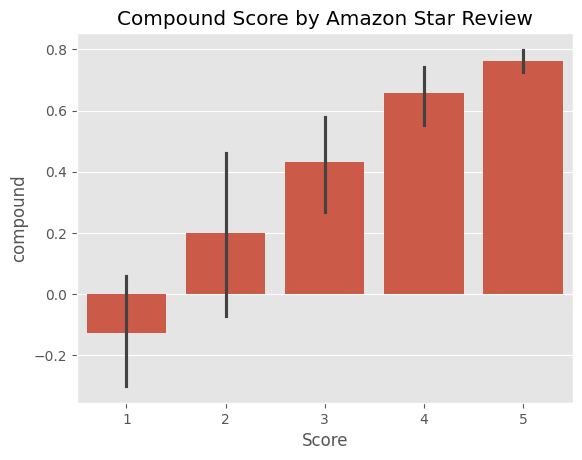

In [129]:
ax = sns.barplot(data = vaders, x ='Score',y = 'compound')
ax.set_title('Compound Score by Amazon Star Review')
plt.show()

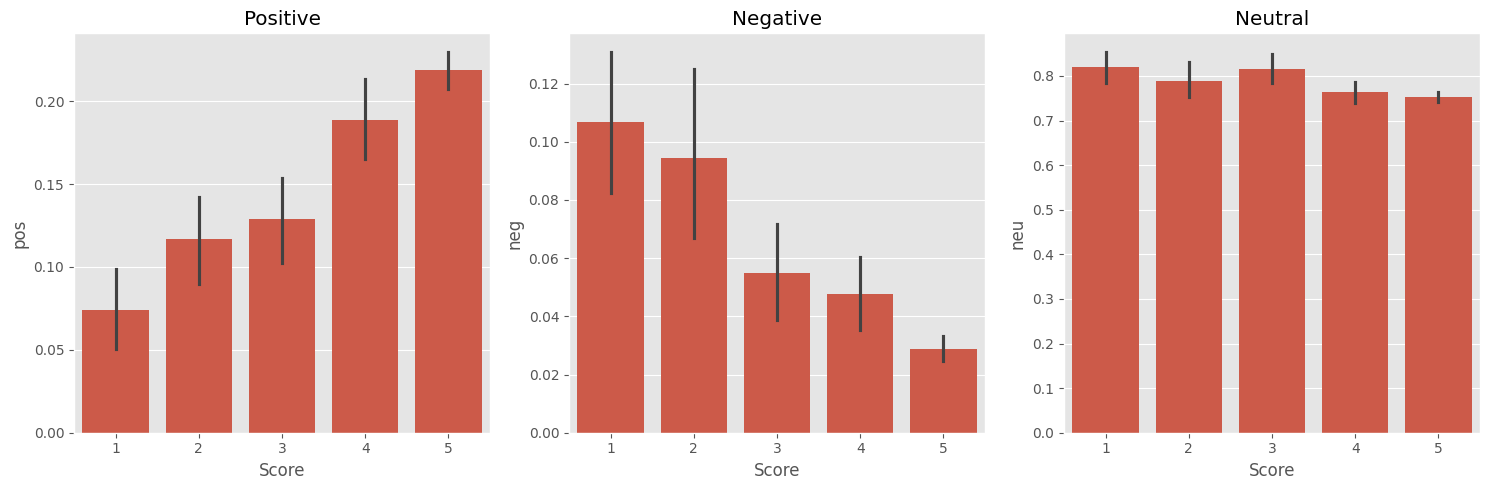

In [130]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))  

sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[2])

axs[0].set_title('Positive')
axs[1].set_title('Negative')
axs[2].set_title('Neutral')

plt.tight_layout()
plt.show()

# RoBERTa Pretrained Model

**RoBERTa (Robustly Optimized BERT Pretraining Approach)** is a transformer-based NLP model developed by Facebook AI.  

- It is an improved version of **BERT**, trained on **more data** and with **better hyperparameters**.  
- Designed for a wide range of NLP tasks: **text classification, sentiment analysis, question answering, NER**, etc.  
- Uses **masked language modeling (MLM)** for pretraining, but removes BERT’s next sentence prediction.  
- Pretrained models are available via **Hugging Face Transformers**, allowing **fine-tuning** on custom datasets.  
- Known for high accuracy and robustness across **various language understanding benchmarks**.


In [137]:
import transformers
import scipy

print(transformers.__version__)
print(scipy.__version__)


5.0.0
1.16.3


In [138]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax


In [140]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)


ImportError: 
AutoModelForSequenceClassification requires the PyTorch library but it was not found in your environment. Check out the instructions on the
installation page: https://pytorch.org/get-started/locally/ and follow the ones that match your environment.
Please note that you may need to restart your runtime after installation.
